## **■ 잠재 의미 분석 (Latent Semantic Analysis, LSA)**

In [ ]:
# (1) 나눔폰트 설치 하기  =====================================
# sudo : 운영자 권한으로 명령어를 실행하라는 의미
# apt-get (Advanced Packaging Tool) : 패키지 관리 tool


!sudo apt-get install -y fonts-nanum
!sudo fc-cache -fv
!rm ~/.cache/matplotlib -rf

In [ ]:
#@title ■ 한글 폰트를 설치한 후 세션을 다시 시작
#
#(2) 세션 다시 시작  : Ctrl + M .
#

In [2]:
# (3) 나눔폰트 설치 확인 하기  ==================================

import  matplotlib
import  matplotlib.font_manager  as fm
import  matplotlib.pyplot  as plt


sys_font  = fm.findSystemFonts ( )

[ font  for  font  in  sys_font  if  "Nanum"  in font ]


['/usr/share/fonts/truetype/nanum/NanumSquareR.ttf',
 '/usr/share/fonts/truetype/nanum/NanumBarunGothicBold.ttf',
 '/usr/share/fonts/truetype/nanum/NanumGothicBold.ttf',
 '/usr/share/fonts/truetype/nanum/NanumSquareB.ttf',
 '/usr/share/fonts/truetype/nanum/NanumSquareRoundB.ttf',
 '/usr/share/fonts/truetype/nanum/NanumGothicCoding.ttf',
 '/usr/share/fonts/truetype/nanum/NanumGothicCodingBold.ttf',
 '/usr/share/fonts/truetype/nanum/NanumMyeongjo.ttf',
 '/usr/share/fonts/truetype/nanum/NanumGothic.ttf',
 '/usr/share/fonts/truetype/nanum/NanumMyeongjoBold.ttf',
 '/usr/share/fonts/truetype/nanum/NanumSquareRoundR.ttf',
 '/usr/share/fonts/truetype/nanum/NanumBarunGothic.ttf']

In [3]:
# (4) 나눔폰트 설정 하기  ==================================
#
#
# font_path = '/usr/share/fonts/truetype/nanum/NanumMyeongjo.ttf'

font_path = "/usr/share/fonts/truetype/nanum/NanumGothicBold.ttf"

font_name  = fm.FontProperties(fname=font_path, size=12).get_name( )

print("◎ 폰트 이름 : ",font_name)

plt.rc("font", family= font_name)       # Nanum 폰트 세팅


◎ 폰트 이름 :  NanumGothic


In [ ]:

!pip install konlpy  -q


     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 19.4/19.4 MB 30.9 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 488.6/488.6 kB 20.0 MB/s eta 0:00:00


In [ ]:
## 기본
import numpy as np                    # numpy 패키지 가져오기
import pandas as pd                   # pandas 패키지 가져오기
import matplotlib.pyplot as plt       # 시각화 패키지 가져오기

import seaborn as sns
import re


from konlpy.tag import Okt
from konlpy.tag import Kkma
from konlpy.tag import Hannanum

from wordcloud  import WordCloud

import time
import datetime


# sklearn 패기지
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.feature_extraction.text import TfidfVectorizer

from sklearn.decomposition import TruncatedSVD


import warnings
warnings.filterwarnings('ignore')

In [ ]:
from google.colab import drive
drive.mount('/content/gdrive/')

file_path = "/content/gdrive/My Drive/Colab Notebooks/wtm/finalproj/"

Drive already mounted at /content/gdrive/; to attempt to forcibly remount, call drive.mount("/content/gdrive/", force_remount=True).


In [6]:
# 데이터 불러오기

hunjea_cases = pd.read_csv(file_path + "분야별_헌재판례.csv")

hunjea_cases.shape


(648, 4)

In [7]:

hunjea_cases


,CaseNum,Title,Category,Content
0,2020헌마542,주민등록법상 지문날인제도 관련 사건,언론 등 정신적 자유에 관한 결정,주민등록법상 지문날인제도 사건<헌재 2024. 4. 25. 2020헌마542 주...
1,2020헌가4,유류분에 관한 위헌제청 및 헌법소원 사건,가족 · 노동 등 사회관계에 관한 결정,민법상 유류분제도 사건 <헌재 2024. 4. 25. 2020헌가4 등 민...
2,2019헌마500,주 52시간 상한제 사건,가족 · 노동 등 사회관계에 관한 결정,주 52시간 상한제 사건 <헌재 2024. 2. 28. 2019헌마500 최저임금...
3,2022헌마356,태아의 성별 고지 제한 사건,가족 · 노동 등 사회관계에 관한 결정,태아의 성별고지 금지 위헌확인 사건 <헌재 2024. 2. 28. 2022헌마35...
4,2020헌마1476,동의 없는 가명정보 처리 사건,언론 등 정신적 자유에 관한 결정,동의 없는 가명정보 처리 사건 <헌재 2023. 10. 26. 2020헌마...
...,...,...,...,...
643,88헌가5등,보호감호 사건,절차적 기본권 및 형사관계에 관한 결정,가. 사건의 배경 이 사건은 제5공화국 당시 국가보위입법회의에서 제정되었던 ...
644,88헌가7,소송촉진특례법 사건,경제 · 재산권 · 조세관계에 관한 결정,가. 사건의 개요 이 사건은 헌법재판소가 창립된 이후 첫 번째 전원합의체 ...
645,대법원 70다1010,국가배상법 제2조 제1항 단서와 법원조직법 제59조 제1항 위헌결정,헌법위원회 및 대법원 헌법판례,원고 피상고인 김희원외 3명 피고 상 고 인 대한민국 제1심 서울민사지방 ...
646,1952.9.9 결정,농지개혁법 제18조 제1항 후단 및 제25조 제1항 후단 위헌결정,헌법위원회 및 대법원 헌법판례,제청법원 대법원 단기4285년 헌위 제1호 법률의 위헌여부결정제청사건에 관하...


In [8]:
# 헌법재판소에서 지정해둔 Category 수 확인

print(hunjea_cases['Category'].unique())
print()

print("◎ 총 매체 수: ", len(hunjea_cases['Category'].unique()))


['언론 등 정신적 자유에 관한 결정' '가족 · 노동 등 사회관계에 관한 결정' '절차적 기본권 및 형사관계에 관한 결정'
 '정치 · 선거관계에 관한 결정' '경제 · 재산권 · 조세관계에 관한 결정' '헌법위원회 및 대법원 헌법판례']

◎ 총 매체 수:  6


In [ ]:
# tokenizer 함수 설정


kkma = Kkma()

# 자주 등장하는 형식적 단어들 소거
stop_words = "규정 조항 대한 소원 목적 요지 헌법소원심판 필요 사건 위헌 합헌 법률 제청 청구인 변호인 제청 재판 피고인 변호사 심판 청구 재판관 이유 위헌확인 피청구인 수사 이유 원칙 여부 확인 우리 법률조항 반대의견 확인 하나 무엇 제한 인정 대상 입법 헌법재판소 재판소"
stop_words = set(stop_words.split(' '))

print('▶ 불용어 = ', stop_words)

# 두 음절 이상의 명사만 추출하는 함수를 정의 =============================

def kkma_tokenizer(text):
    nouns = kkma.nouns(text)    # 해당 칼럼에서 명사만 추출
    return [noun for noun in nouns if (len(noun) > 1) and (not noun in stop_words) and not re.search(r'\d', noun)]    # 두 음절 이상의 명사 추출 & 불용어 제거 후 반환

▶ 불용어 =  {'위헌', '수사', '반대의견', '인정', '헌법재판소', '재판관', '청구인', '피청구인', '목적', '합헌', '헌법소원심판', '원칙', '이유', '제청', '법률', '청구', '피고인', '사건', '위헌확인', '법률조항', '무엇', '재판소', '요지', '여부', '우리', '입법', '대상', '심판', '소원', '제한', '확인', '재판', '변호사', '하나', '필요', '변호인'}


In [25]:
# OKT tokenizer 함수 설정

okt = Okt()

stop_words = "규정 조항 대한 소원 목적 요지 헌법소원심판 필요 사건 위헌 합헌 법률 제청 청구인 변호인 제청 재판 피고인 변호사 심판 청구 재판관 이유 위헌확인 피청구인 수사 이유 원칙 여부 확인 우리 법률조항 반대의견 확인 하나 무엇 제한 인정 대상 입법 헌법재판소 재판소"
stop_words = set(stop_words.split(' '))

def okt_tokenizer(text):
    nouns = okt.nouns(text)
    return [noun for noun in nouns if len(noun) > 1 and (not noun in stop_words)]   # 한음절 이상의 명사만 추출


In [ ]:
# TFidf를 이용하여 문서-단어 행렬을 생성
#
# 아래 매개변수 max_features 를 지정해 주지 않으면 많은 시간 소요됨  - n_gram 지정시에는 더욱 주의해야 함


vectorizer = TfidfVectorizer(tokenizer=okt_tokenizer,
                              max_df=0.90,    # 문서빈도 상한선 (n% 가 넘는 문서에 출현하는 단어는 미고려)
                              min_df=3,       # min_df=n : 문서빈도 하한선 (n개 이상의 문서에 출현해야 그 단어를 고려함)
                              max_features=600)     # 전체 문서에서 출현 빈도가 높은 n개 단어만을 고려


In [ ]:
# 판결문의 내용을 위의 기준으로 하나의 instance 를 만듦
#

start = time.time()    # 시작 시간 기록

tfidf_dtm = vectorizer.fit_transform(hunjea_cases['Content'])   # 'content' 데이터의 문서-단어 행렬을 만듦

processing_time = time.time() - start    # 경과 시간 계산
times = str(datetime.timedelta(seconds = processing_time))
print()
print('▶ 수행 시간 = ', times)



▶ 수행 시간 =  0:02:28.400820


In [15]:
# TF-IDF 행렬의 크기 확인

tfidf_dtm.shape


(648, 600)

In [16]:
# 추출된 단어가 무슨 단어인지 확인

print(vectorizer.get_feature_names_out()[:50])


['가결' '가능성' '가액' '가운데' '가입' '가족' '가중' '가지' '가치' '각종' '각하' '간의' '강제' '개념'
 '개발' '개별' '개선' '개시' '개월' '개인' '개인정보' '개정' '객관' '거나' '거래' '거부' '건강' '검사'
 '것이므' '게시' '게임' '결과' '경계' '경과' '경우' '경제' '경찰' '계속' '계약' '계획' '고려' '고시'
 '고용' '공개' '공공' '공권력' '공단' '공무' '공무원' '공익']


In [ ]:
# n_components parameter : 토픽의 숫자를 의미

n_topics = 8
for n_topic in range(5, n_topics+1) :

  svd_model = TruncatedSVD(n_components=n_topic, n_iter=50, random_state=100)

  globals()['tsvd_S_{}'.format(n_topic)] = svd_model.fit_transform(tfidf_dtm)


In [ ]:
# tsvd_S_() 는 LSA 에서 U*Sigma 행렬에 해당 (문서-토픽 행렬)

for n_topic in range(5, n_topics+1) :
  print ( globals()['tsvd_S_{}'.format(n_topic)].shape)


(648, 5)
(648, 6)
(648, 7)


In [19]:
for n_topic in range(5, n_topics+1) :

  dominant_topic = globals()['tsvd_S_{}'.format(n_topic)].argmax(axis=1)
  print( pd.Series(dominant_topic).value_counts() )

0    542
1     53
3     26
4     16
2     11
Name: count, dtype: int64
0    519
1     52
3     26
5     24
4     16
2     11
Name: count, dtype: int64
0    506
1     52
3     26
5     24
4     16
6     13
2     11
Name: count, dtype: int64


In [ ]:
# svd_model.componets_는 LSA에서 VT에 해당 (토픽-단어 행렬)

for n_topic in range(5, n_topics+1) :

  svd_model = TruncatedSVD(n_components=n_topic, n_iter=50, random_state=100)
  svd_model.fit_transform(tfidf_dtm)

  tempt = svd_model.components_  # (토픽의 수 t) * (단어의 수)의 크기를 가짐

  globals()['VT_{}'.format(n_topic)] = tempt

  print( globals()['VT_{}'.format(n_topic)].shape )


(5, 600)
(6, 600)
(7, 600)


In [ ]:
# get_feature_names_out 함수 이용

terms = vectorizer.get_feature_names_out() # 단어 집합 - 600개의 단어가 저장됨


# Topic 행의 각 600개의 열 중 가장 값이 큰 5개의 값을 찾아서 단어로 출력
# argsort(): numpy 배열의 원소를 오름차순으로 정렬하고 인덱스 배열을 반환

def get_topics(components, feature_names, n=5):
    for index, topic in enumerate(components):
        print("Topic %d:" % (index), [(feature_names[i], topic[i].round(5)) for i in topic.argsort()[:-n-1:-1]])


# 위 함수를 호출

for n_topic in range(5, n_topics+1) :
  print(f"Topic 개수 : {n_topic}일 때 \n")
  svd_model = TruncatedSVD(n_components=n_topic, n_iter=50, random_state=100)
  svd_model.fit_transform(tfidf_dtm)
  get_topics(svd_model.components_, terms)
  print()


Topic 개수 : 5일 때 

Topic 0: [('조항', 0.29397), ('행위', 0.19839), ('규정', 0.17076), ('침해', 0.14749), ('경우', 0.13953)]
Topic 1: [('선거', 0.56839), ('후보자', 0.47413), ('선거운동', 0.34778), ('공직선거법', 0.20935), ('정당', 0.17486)]
Topic 2: [('처벌', 0.34102), ('행위', 0.26413), ('범죄', 0.20998), ('형법', 0.19537), ('형벌', 0.19497)]
Topic 3: [('접견', 0.56891), ('수용', 0.40704), ('수형', 0.23637), ('집회', 0.14623), ('조력', 0.14507)]
Topic 4: [('집회', 0.75399), ('시위', 0.35362), ('옥외', 0.22858), ('국회', 0.12719), ('행위', 0.11682)]

Topic 개수 : 6일 때 

Topic 0: [('조항', 0.29397), ('행위', 0.19839), ('규정', 0.17076), ('침해', 0.14749), ('경우', 0.13953)]
Topic 1: [('선거', 0.56839), ('후보자', 0.47413), ('선거운동', 0.34778), ('공직선거법', 0.20935), ('정당', 0.17486)]
Topic 2: [('처벌', 0.34102), ('행위', 0.26413), ('범죄', 0.20998), ('형법', 0.19537), ('형벌', 0.19497)]
Topic 3: [('접견', 0.56891), ('수용', 0.40704), ('수형', 0.23637), ('집회', 0.14623), ('조력', 0.14507)]
Topic 4: [('집회', 0.75399), ('시위', 0.35362), ('옥외', 0.22858), ('국회', 0.12719), ('행위', 0.11682)]
T

Topic 개수 : 5일 때

◎ 주제가 ( 0 ) 인 문서의 개수 = 542
◎ 주제가 ( 1 ) 인 문서의 개수 = 53
◎ 주제가 ( 2 ) 인 문서의 개수 = 11
◎ 주제가 ( 3 ) 인 문서의 개수 = 26
◎ 주제가 ( 4 ) 인 문서의 개수 = 16



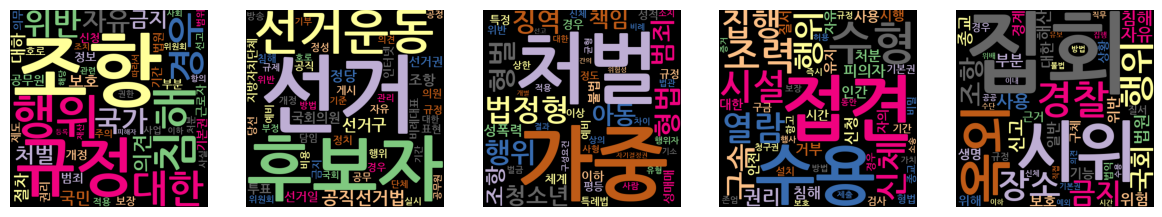



Topic 개수 : 6일 때

◎ 주제가 ( 0 ) 인 문서의 개수 = 519
◎ 주제가 ( 1 ) 인 문서의 개수 = 52
◎ 주제가 ( 2 ) 인 문서의 개수 = 11
◎ 주제가 ( 3 ) 인 문서의 개수 = 26
◎ 주제가 ( 4 ) 인 문서의 개수 = 16
◎ 주제가 ( 5 ) 인 문서의 개수 = 24



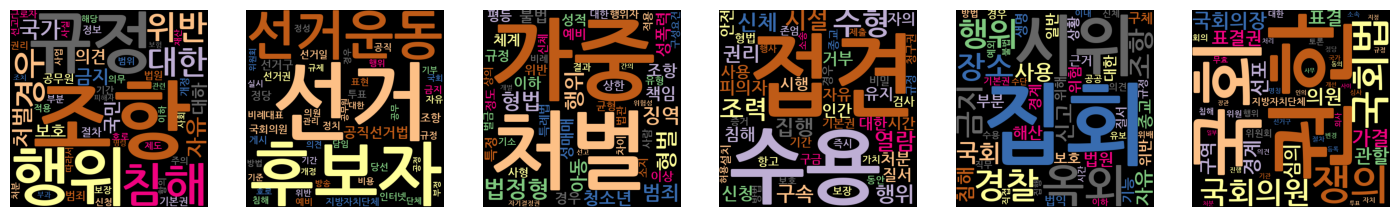



Topic 개수 : 7일 때

◎ 주제가 ( 0 ) 인 문서의 개수 = 506
◎ 주제가 ( 1 ) 인 문서의 개수 = 52
◎ 주제가 ( 2 ) 인 문서의 개수 = 11
◎ 주제가 ( 3 ) 인 문서의 개수 = 26
◎ 주제가 ( 4 ) 인 문서의 개수 = 16
◎ 주제가 ( 5 ) 인 문서의 개수 = 24
◎ 주제가 ( 6 ) 인 문서의 개수 = 13



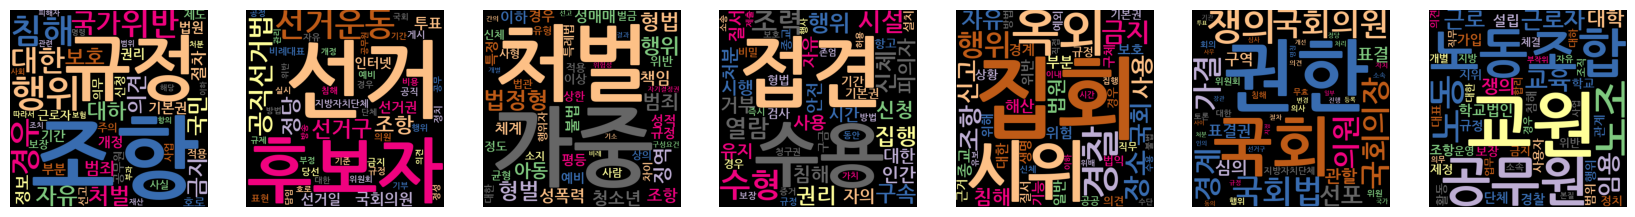

In [24]:

wordcloud = WordCloud(font_path=font_path,
                      colormap = 'Accent_r',
                      width=500,
                      height=500,
                      max_words=50,
                      random_state=100)
                      #background_color='white')


# 판결문마다 토픽을 부여
# 문서-토픽 행렬 tsvd_S 의 크기는 (648, 6) 행렬 - 각 행에서 가장 큰 값이 존재
# 'topic' 이라는 열을 새로 만들고 가장 큰 값을 저장

for i in range(5,n_topics+1) :
  hunjea_cases[f'Topic_num{i}'] = globals()[f'tsvd_S_{i}'].argmax(axis=1)     # axis=1 : 하나의 행 내에서 가장 큰 값의 인덱스를 반환, (axis가 0 이면 열)

  plt.figure(figsize=(30, 6))     # figsize=(가로 길이, 세로 길이)

  print(f"Topic 개수 : {i}일 때\n")

  for idx in range(i):
      # 토픽이 idx인 문서의 인덱스를 추출  : (예) 97번째 문서의 토픽이 idx 이면 문서의 인덱스인 97 을 추출
      # 문서별 주제를 구분하기 위함
      topic_idx = hunjea_cases.index[hunjea_cases[f'Topic_num{i}'] == idx]    # topic_idx 에는 동일 토픽 문서들이 그룹핑 됨

      print('◎ 주제가 ( {0} ) 인 문서의 개수 = {1}' .format(idx, len(topic_idx)))

      # 토픽이 idx인 문서에서  tfidf 값 합계를 단어의 점수로 계산 : tfidf_dtm 는 (문서 - 단어 행렬 ) 임 - 행이 문서, 열이 단어
      word_score = tfidf_dtm.toarray()[topic_idx].sum(axis=0)    # axis=0 : 열의 위 아래값을 더해줌

      # {단어: 점수} 형태의 사전을 만듦
      d = dict(zip(vectorizer.get_feature_names_out(), word_score))

      # 워드클라우드를 생성
      wordcloud.generate_from_frequencies(d)

      plt.subplot(1,10,idx+1)
      plt.imshow(wordcloud)
      plt.axis("off")

  print()
  plt.subplots_adjust(wspace=0.2, hspace=0.2)
  plt.show()

  print()
  print()